In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [157]:
from Preprocessor import Preprocessor

#FilterReview
from sklearn.model_selection import train_test_split 
from sklearn.cluster import KMeans
from sklearn import metrics 
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import pickle 
'''
readCSV :CSV 파일을 읽는다. 고정포맷이 정해짐 
trainModel(ts =0.25): 입력된 모델에서 학습시킨다. ts 테스트 케이스 
predict(): 학습시킨 모델에 test데이터가 입력되면 예측한다. 
writePredictionResult(): 예측 결과를 파일로 출력한다. 
'''
class FilterReviewSV:
    def __init__(self):
        self.model_filename = 'FilterReviewSV_model.sav'
        self.isSetModel = False
        if not(self.isSetModel):
            self.kmeans_data = pd.read_csv('FilterReviewSV_model.csv',encoding='euc-kr')
            self.kmeans = pickle.load(open(self.model_filename, 'rb'))
            
    def input_X(self, para):
        pre = Preprocessor()
        pre.setPara(para)
        self.X = pre.transVector()
    def input_Y(self, result):
        self.Y = result
        
    def readCSV(self,filename,tag=True):
        self.data = pd.read_csv(filename,encoding='euc-kr')
        self.X_content = self.data['글'].values
        self.input_X(self.X_content)
        if tag == True:
            self.input_Y(self.data['tag'].values)
        
    def trainModel(self):
        
        #self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(self.X,self.Y,test_size=ts)
        #print(self.y_train,self.y_test)
        self.kmeans  = KMeans(n_clusters=2).fit(self.X) 

        #self.y_pred = self.kmeans.fit(self.X_train, self.y_train).predict(self.X_test)

        # 테스트 socre 확인
        #print("Number of right labeled points out of a total %d points : %.2f %%"
      #% (len(self.X),100*(len(self.X)-(self.y_test != self.y_pred).sum())/len(self.X)))
        
        self.data['category'] = self.kmeans.labels_
        self.kmeans_data = self.data
        
        self.kmeans_data.to_csv('FilterReviewSV_model.csv',encoding='euc-kr')
        pickle.dump(self.kmeans, open(self.model_filename, 'wb'))
        
        self.isSetModel = True
    def predict(self):
        self.y_pred = self.kmeans.predict(self.X)
        self.y_pred
        print('\n\n\n')
        print(self.y_pred)
        tolabel = np.zeros(self.y_pred.shape[0],dtype='int32')
        print(tolabel)
        for i in range(self.y_pred.shape[0]):
            pred = self.y_pred[i]
            sample_set = self.kmeans_data[self.kmeans_data['category']==pred]
            #print(sample_set['category'].head())
            
            tolabel[i] = 1 if sample_set['tag'].mean()>0.5 else 0
            
        tolabel_pd = pd.DataFrame({'P_tag':tolabel})
        tolabel_pd.reset_index(inplace=True)
        self.data.reset_index(inplace=True)
        print(tolabel_pd)
        print(self.data)
        self.data_labeled = pd.merge(self.data,tolabel_pd,on='index' )
        self.data_labeled.drop(labels='index',axis=1,inplace=True)
        print(self.data_labeled.head())
        return self.data_labeled
    
    def writePredictionResult(self, filename):
        self.data_labeled.to_csv(filename,encoding='euc-kr')

In [158]:
fr = FilterReviewSV()
#fr.input_X('나는 멍청이다.\n취업 좀 하자\n취업 좀 하자\n취업 좀 하자')
#fr.input_Y([1,0,1,0])
#fr.readCSV(tag=True,filename='Train.csv')
#fr.trainModel()

fr.readCSV(tag=False,filename='Test.csv')
fr.predict()

fr.writePredictionResult('sample.csv')
#print(fr.y_pred)
#fr.X_content


['나는 멍청하다.' '지수는 왜 나갔을까?' '언제 취업하지…' '잠온다.']




[1 0 0 0]
[0 0 0 0]
   index  P_tag
0      0      1
1      1      0
2      2      0
3      3      0
   index            글    조회수  tag
0      0     나는 멍청하다.  10000    1
1      1  지수는 왜 나갔을까?    200    0
2      2     언제 취업하지…    300    1
3      3         잠온다.      2    0
             글    조회수  tag  P_tag
0     나는 멍청하다.  10000    1      1
1  지수는 왜 나갔을까?    200    0      0
2     언제 취업하지…    300    1      0
3         잠온다.      2    0      0


In [2]:
pre = PreProcessor()
pre.setPara('')

pre.transVector()
pre.Vec

NameError: name 'PreProcessor' is not defined

In [5]:

df = pd.DataFrame(columns=['height', 'weight'])
df.loc[0] = [185,60]
df.loc[1] = [180,60]
df.loc[2] = [185,70]
df.loc[3] = [165,63]
df.loc[4] = [155,68]
df.loc[5] = [170,75]
df.loc[6] = [185,65]

df2 = pd.DataFrame(columns=['height', 'weight'])
df2.loc[0] = [185,75]
df2.loc[1] = [175,63]
df2.loc[2] = [165,60]
df2.loc[3] = [170,66]



In [6]:

df.head(7)

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,185,65


In [7]:
len(df)

7

In [8]:
df3 = df.append(df2,ignore_index=True)
df3

,height,weight
0,185,60
1,180,60
2,185,70
3,165,63
4,155,68
5,170,75
6,185,65
7,185,75
8,175,63
9,165,60


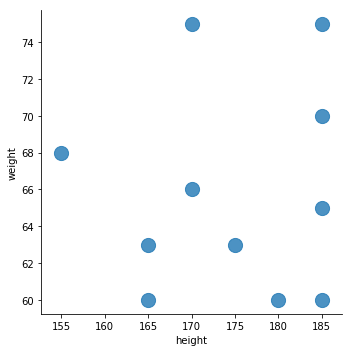

In [9]:
sns.lmplot('height', 'weight', 
           data=df3, fit_reg=False, 
           scatter_kws={"s": 200})

In [10]:

data_points = df3.values
kmeans = KMeans(n_clusters=4).fit(data_points)


In [15]:
KMeans.predict(np.array([[185,80]]))

TypeError: predict() missing 1 required positional argument: 'X'

In [11]:
df3.values

array([[185, 60],
       [180, 60],
       [185, 70],
       [165, 63],
       [155, 68],
       [170, 75],
       [185, 65],
       [185, 75],
       [175, 63],
       [165, 60],
       [170, 66]], dtype=object)

In [12]:
kmeans.cluster_centers_

array([[171.66666667,  68.        ],
       [161.66666667,  63.66666667],
       [183.33333333,  61.66666667],
       [185.        ,  72.5       ]])

In [13]:
df3['cluster_id'] = kmeans.labels_

In [100]:
df3.head(12)


,height,weight,cluster_id
0,185,60,0
1,180,60,0
2,185,70,3
3,165,63,1
4,155,68,1
5,170,75,2
6,185,65,0
7,185,75,3
8,175,63,2
9,165,60,1


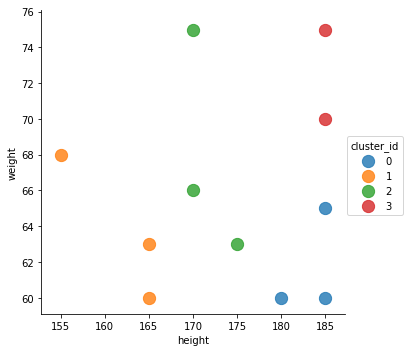

In [102]:

sns.lmplot('height', 'weight', data=df3, fit_reg=False,
           scatter_kws={"s": 150},
           hue="cluster_id")

In [129]:
# cluster id와 target id가 동일한 경우 하나의 클러스터로 통합. 
df4= df3[len(df):]
eq_cluster = list(set(df4['cluster_id'].values))
eq_cluster[:]

[1, 2, 3]

In [141]:
for i in range(len(eq_cluster)):
    df3.loc[df3['cluster_id']==eq_cluster[i],"cluster_id"] = 5

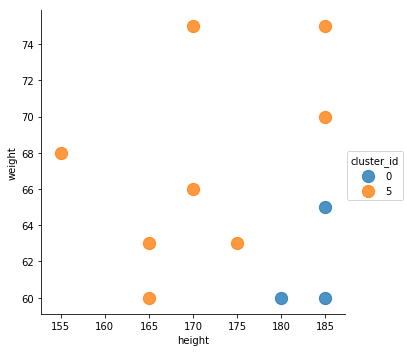

In [143]:

sns.lmplot('height', 'weight', data=df3, fit_reg=False,
           scatter_kws={"s": 150},
           hue="cluster_id")